In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv('spam_dataset.csv', encoding='latin-1')
# df1 = pd.read_csv('spam.csv', encoding='latin-1')
# df.info()
# df1.sample(5)
df.sample(5)
df.rename(columns={'label':'target','sms':'text'},inplace=True)
df.sample(5)

,text,target,Unnamed: 2,Unnamed: 3,Unnamed: 4
23589,strong buy alert > > otc : feky ( full profile...,1,NaN,NaN,NaN
6749,california update 3 / 21 / 01\n\nexecutive sum...,0,NaN,NaN,NaN
1171,"I've got ten bucks, jay is being noncomittal\n",0,NaN,NaN,NaN
125,Yup i thk cine is better cos no need 2 go down...,0,NaN,NaN,NaN
24140,"office xp - $ 60 plaids meagerly\n\nchildren ,...",1,NaN,NaN,NaN


In [24]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [25]:
df.head()

,text,target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,U dun say so early hor... U c already then say...,0
3,"Nah I don't think he goes to usf, he lives aro...",0
4,Even my brother is not like to speak with me. ...,0


In [26]:
df = df.drop_duplicates(keep='first')
df.shape

(26238, 2)

# 2. EDA

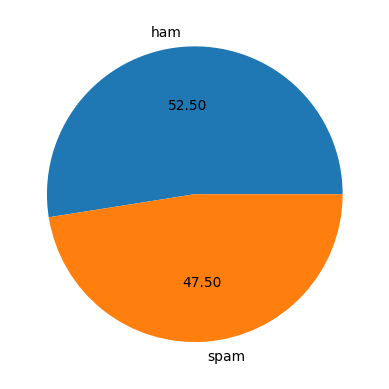

In [27]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [29]:
!pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 435.7 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.5 MB 544.7 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.5 MB 1.2 MB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.5 MB 1.6 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.5 MB 2.0 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.5 MB 2.1 MB/s eta 0:00:01
   ------------------- -------------------- 0.7/1.5 MB 2.2 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 2.3 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.2/1.5 MB 2.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 2.6 MB/s eta 0:00:01
   -------------------

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [32]:
df['num_characters'] = df['text'].apply(len)

In [33]:
df.head()

,text,target,num_characters
0,"Go until jurong point, crazy.. Available only ...",0,112
1,Ok lar... Joking wif u oni...\n,0,30
2,U dun say so early hor... U c already then say...,0,50
3,"Nah I don't think he goes to usf, he lives aro...",0,62
4,Even my brother is not like to speak with me. ...,0,78


In [34]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [44]:
df.head()

,text,target,num_characters,num_words
0,"Go until jurong point, crazy.. Available only ...",0,112,24
1,Ok lar... Joking wif u oni...\n,0,30,8
2,U dun say so early hor... U c already then say...,0,50,13
3,"Nah I don't think he goes to usf, he lives aro...",0,62,15
4,Even my brother is not like to speak with me. ...,0,78,18


In [49]:
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,26238.000000,26238.000000
mean,1119.023820,228.533539
std,1912.640842,383.210037
min,1.000000,1.000000
25%,163.000000,36.000000
50%,494.000000,103.000000
75%,1220.750000,251.000000
max,32759.000000,8386.000000


In [50]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

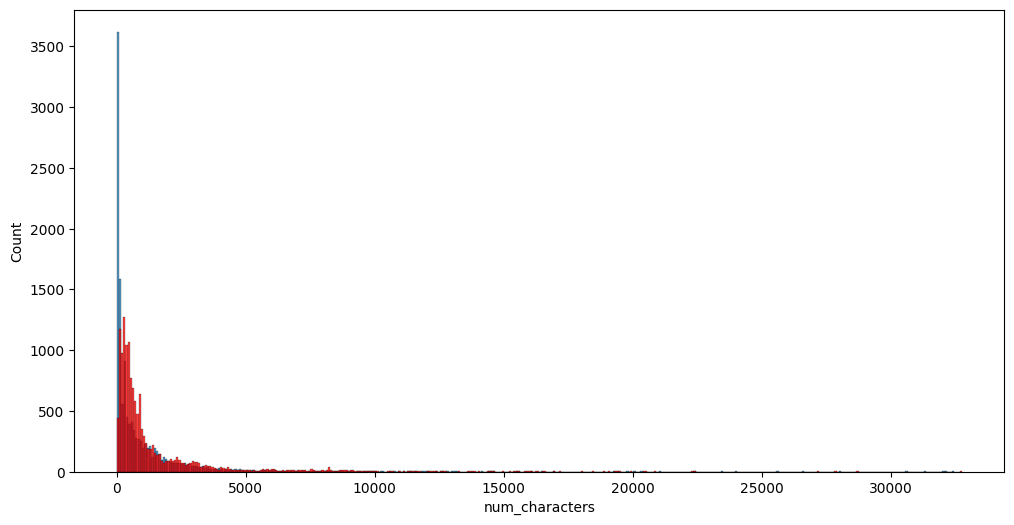

In [51]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

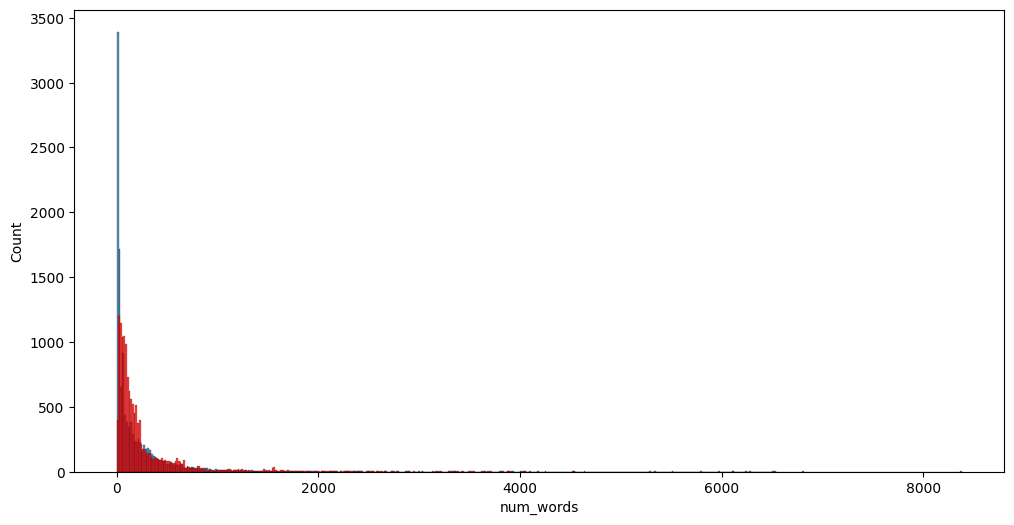

In [52]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

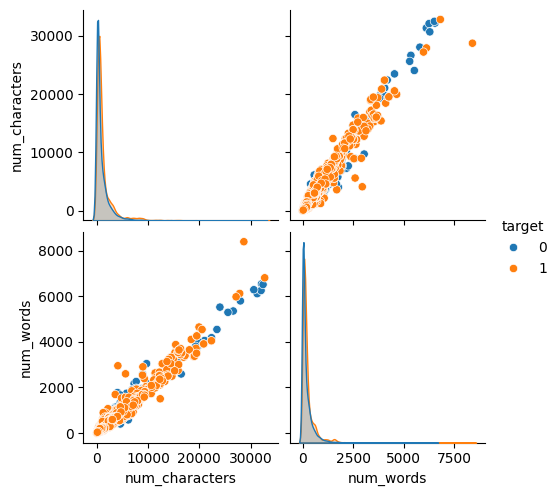

In [53]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing

In [56]:
!pip install nltk

In [69]:
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\patil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [71]:
df['text'][10]

'Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet.\n'

In [72]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [73]:
df['transformed_text'] = df['text'].apply(transform_text)

KeyboardInterrupt: 